In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r'C:\Users\Dell\Desktop\Programs\Scaraping\py-scraping\Combined_csvs\final_cleaned_smartphones2.csv')

In [4]:
df.head(10)

,product_name,rating_stars,number_of_reviews,bought_last_month,discounted_mrp,original_mrp,discount%,free_delivery,brand,product,color,storage_in_GB,RAM_in_GB
0,Apple iPhone 15 () -,4.5,217,200,65900.0,79900,18.0,0,apple,iPhone 15,Green,128,6
1,Apple iPhone 15 () - Pink,4.4,213,100,65900.0,79600,17.0,0,apple,iPhone 15,Pink,128,6
2,Apple iPhone 13 () - Starlight,4.5,7819,5000,45490.0,59900,24.0,0,apple,iPhone 13,Starlight,128,6
3,Apple iPhone 13 () - Midnight,4.5,6614,5000,45490.0,59600,24.0,0,apple,iPhone 13,Midnight,128,6
4,Apple iPhone 13 () - Pink,4.5,3136,5000,45490.0,59900,24.0,0,apple,iPhone 13,Pink,128,6
5,Apple iPhone 16 () -,4.5,79,500,78400.0,79900,2.0,0,apple,iPhone 16,Black,128,8
6,Apple iPhone 15 () -,4.5,637,500,65900.0,79600,17.0,0,apple,iPhone 15,Blue,128,6
7,Apple iPhone 16 () - Ultramarine,4.5,79,500,77900.0,79900,3.0,0,apple,iPhone 16,Ultramarine,128,8
8,Apple iPhone 15 Plus () -,4.6,236,400,69900.0,89600,22.0,0,apple,iPhone 15 Plus,Blue,128,6
9,Apple iPhone 14 () -,4.5,1640,200,54900.0,69600,21.0,0,apple,iPhone 14,Blue,128,6


In [5]:
df.dtypes

product_name          object
rating_stars         float64
number_of_reviews      int64
bought_last_month      int64
discounted_mrp       float64
original_mrp           int64
discount%            float64
free_delivery          int64
brand                 object
product               object
color                 object
storage_in_GB          int64
RAM_in_GB              int64
dtype: object

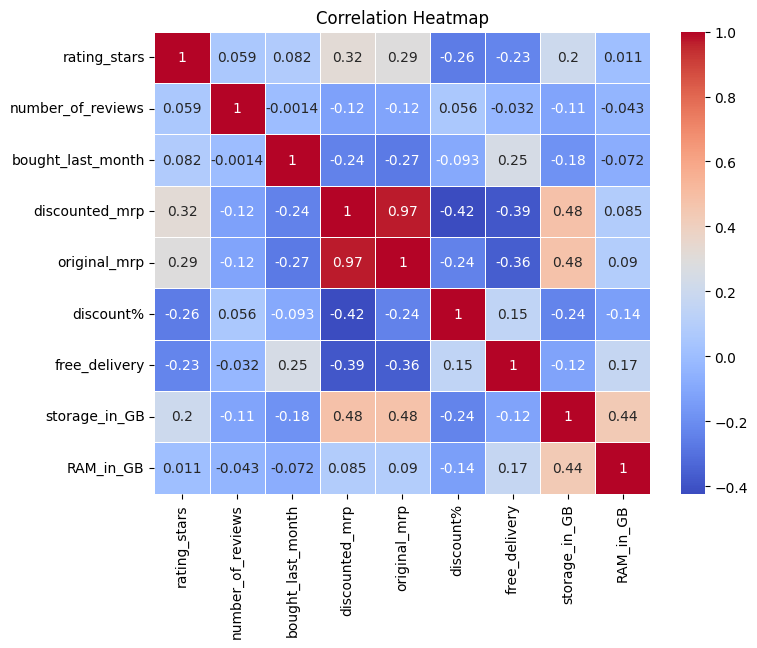

In [6]:
import seaborn as sns

numeric=df.select_dtypes(exclude=['object'])
numeric.corr()
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

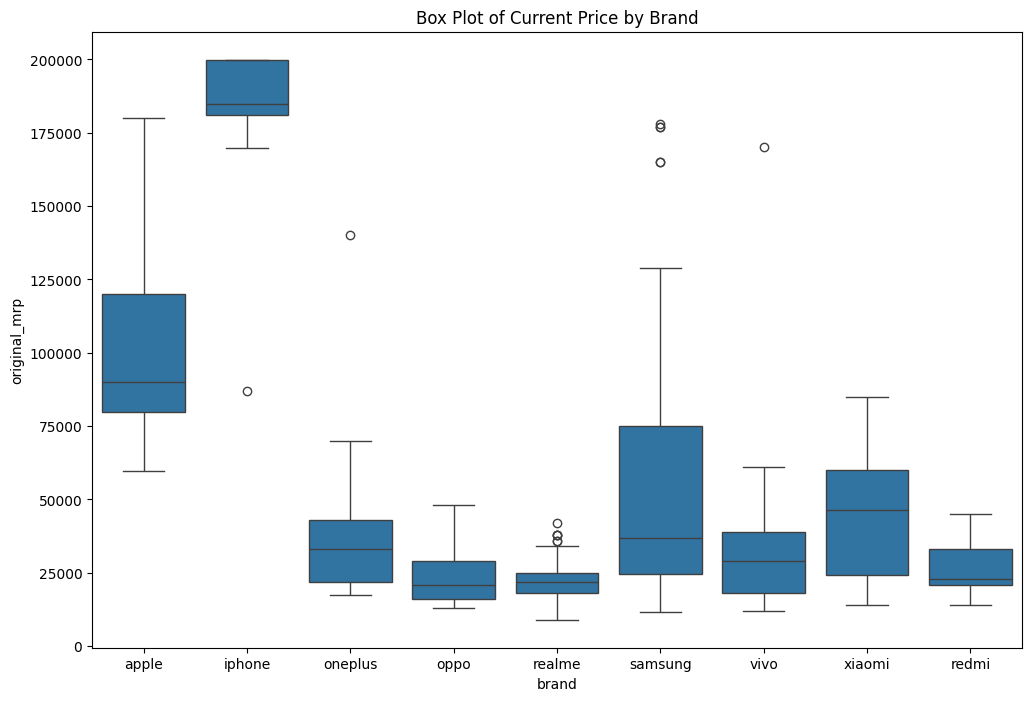

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(x='brand', y='original_mrp', data=df)
# plt.xticks(rotation=90)
plt.title('Box Plot of Current Price by Brand')
plt.show()

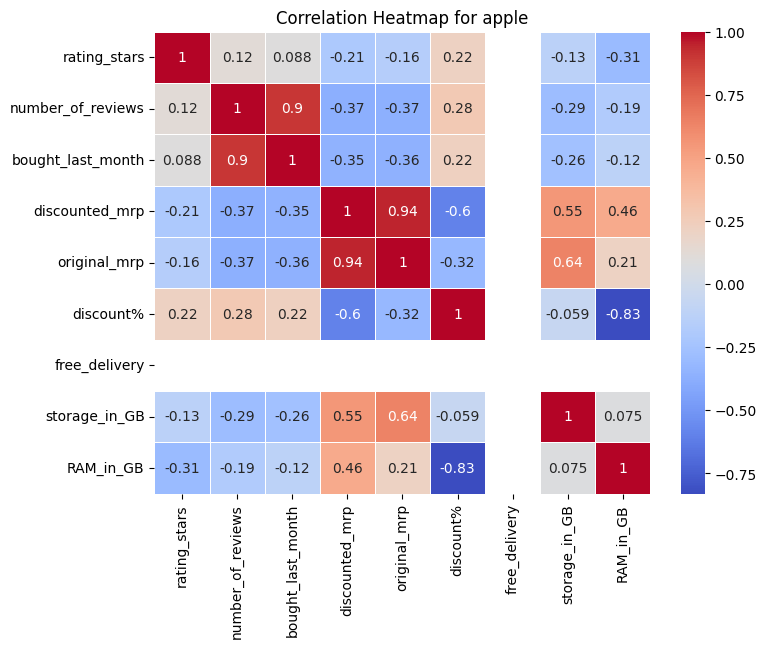

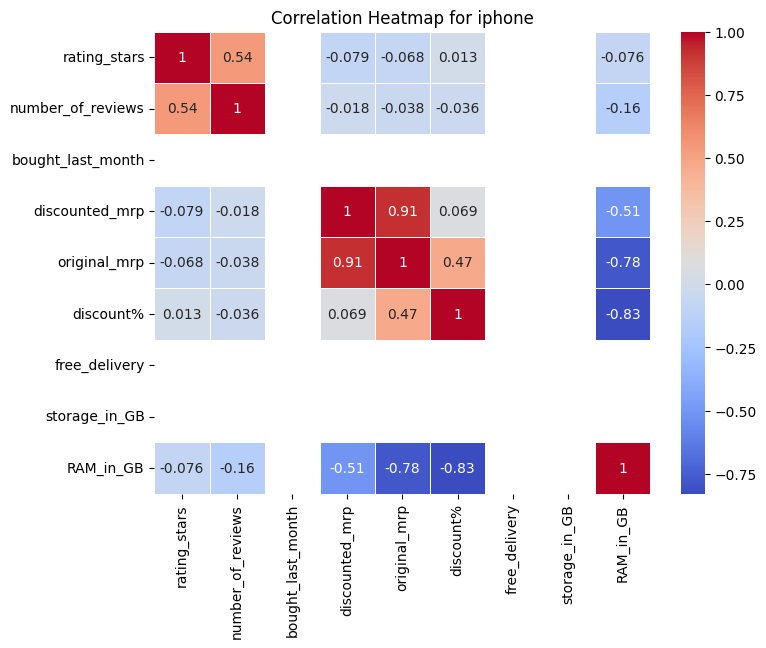

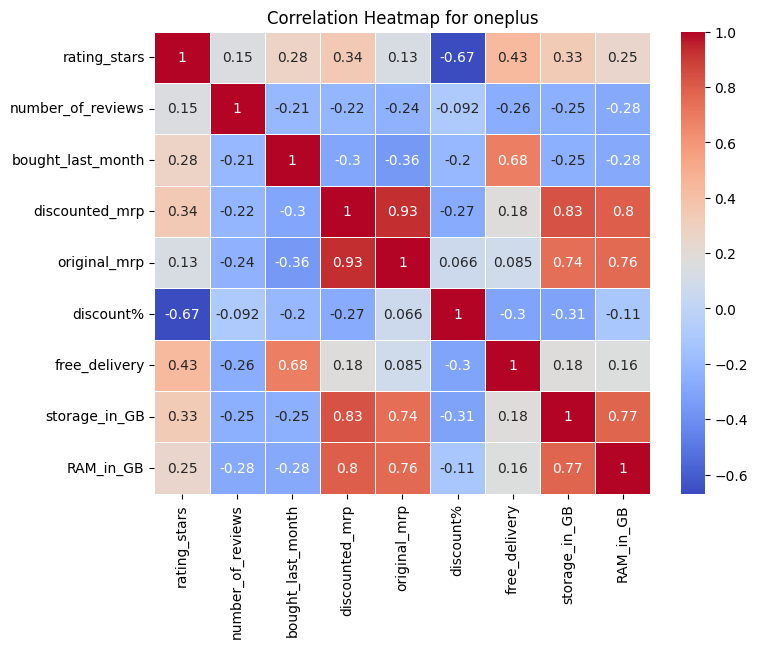

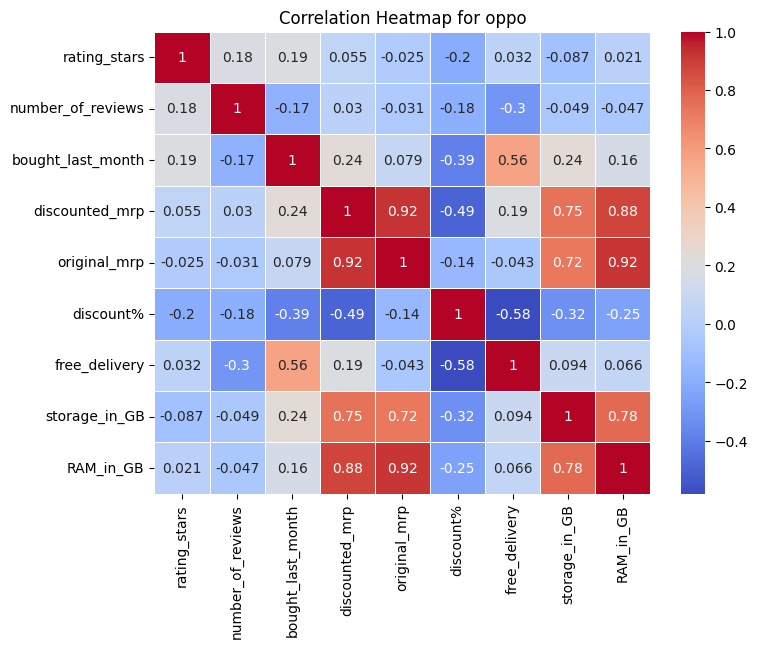

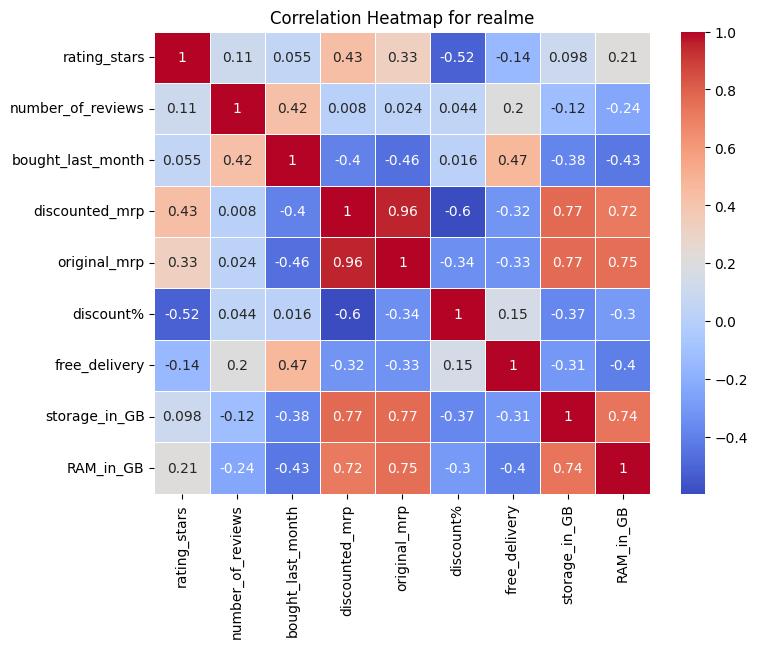

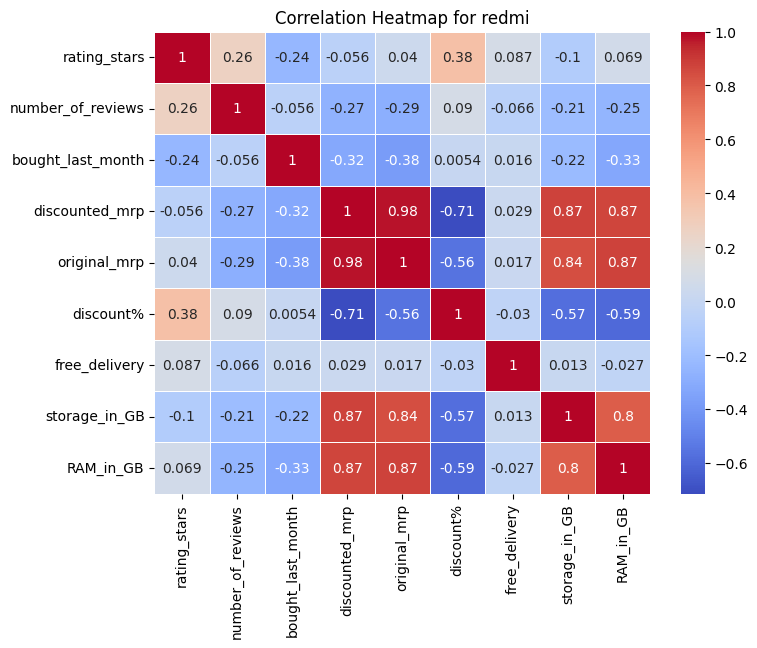

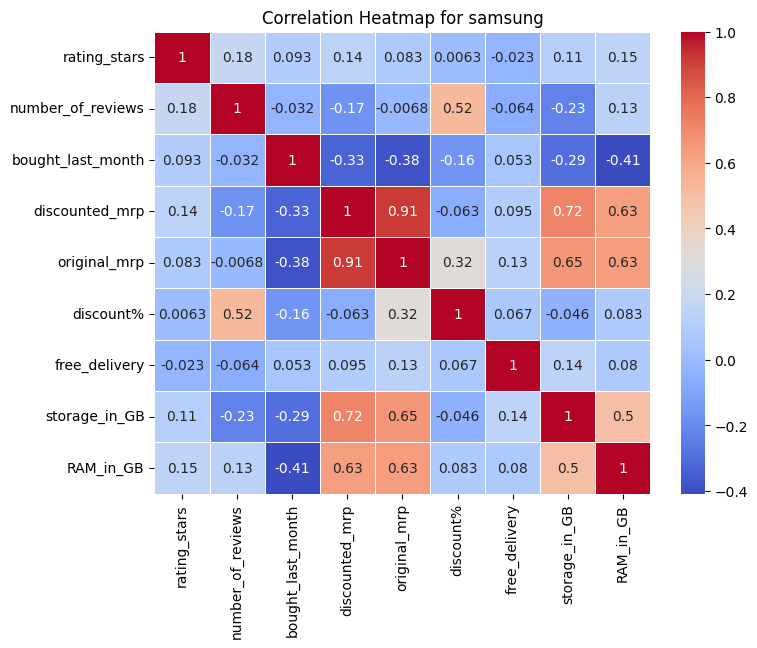

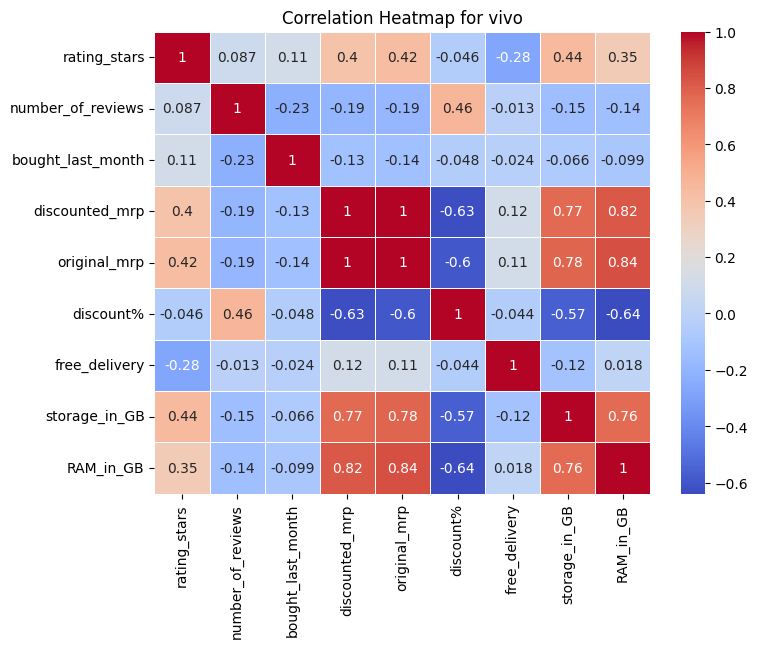

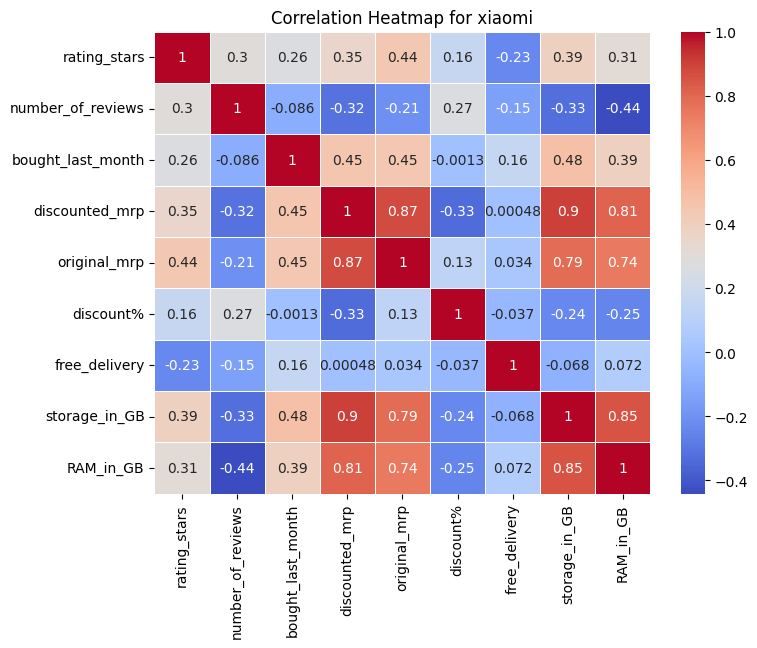

In [8]:
# Group by 'Brand' and plot correlation heatmap for each brand
for brand_name, group_data in df.groupby('brand'):
    # Select only numeric columns within each brand group
    numeric_data = group_data.select_dtypes(exclude=['object'])
    
    # Calculate correlation matrix
    corr_matrix = numeric_data.corr()
    
    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Correlation Heatmap for {brand_name}')
    plt.show()


In [9]:
df['brand'].unique()

array(['apple', 'iphone', 'oneplus', 'oppo', 'realme', 'samsung', 'vivo',
       'xiaomi', 'redmi'], dtype=object)

In [10]:
# Replace 'iphone' with 'apple' and 'redmi' with 'xiaomi'
df['brand'] = df['brand'].replace({'iphone': 'apple', 'redmi': 'xiaomi'})


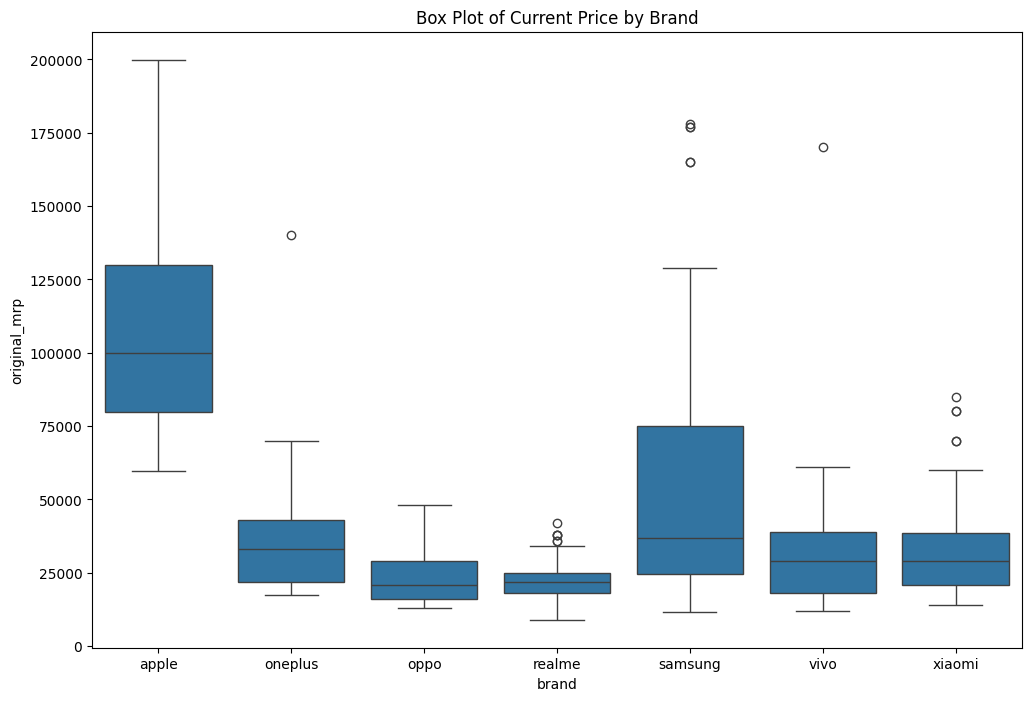

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(x='brand', y='original_mrp', data=df)
# plt.xticks(rotation=90)
plt.title('Box Plot of Current Price by Brand')
plt.show()

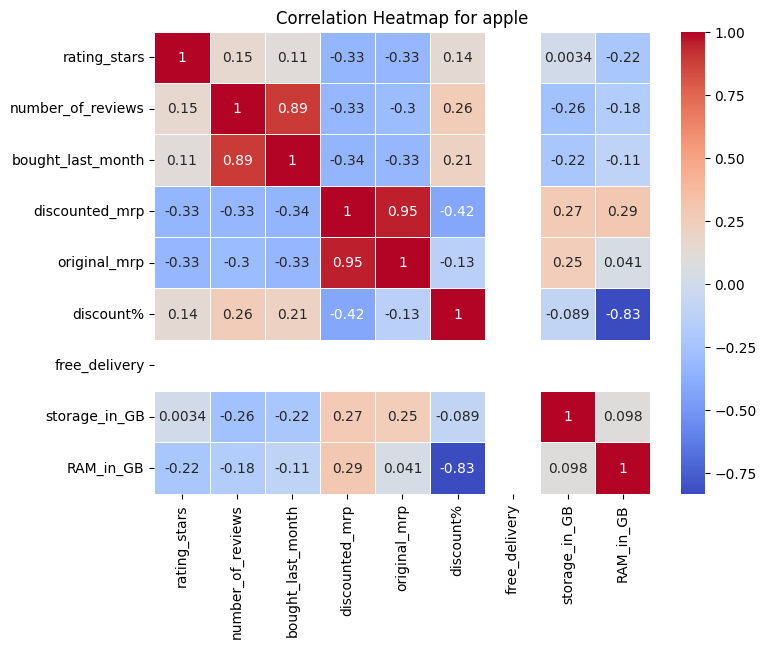

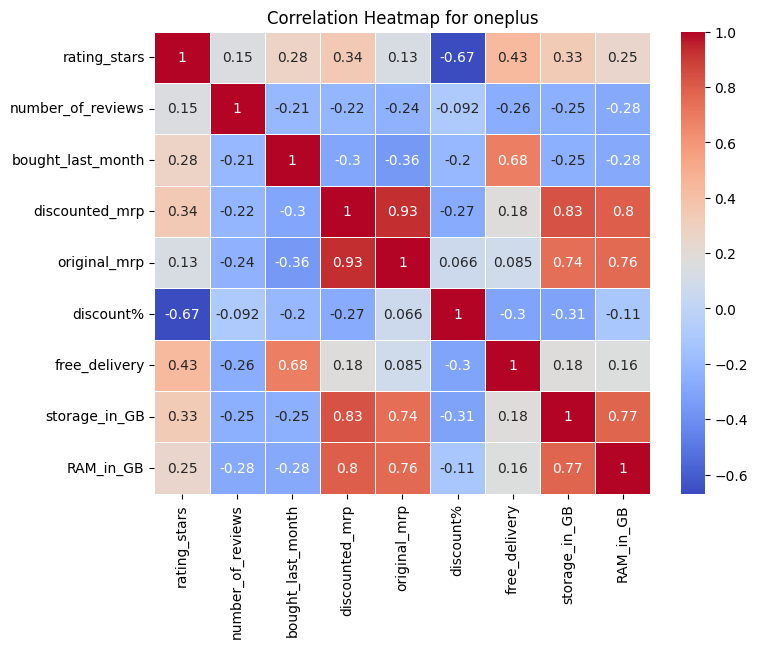

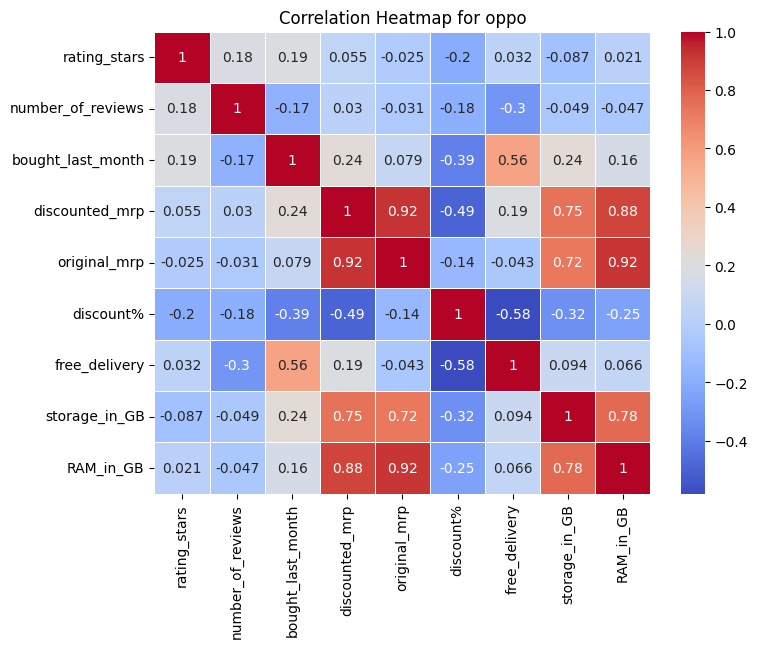

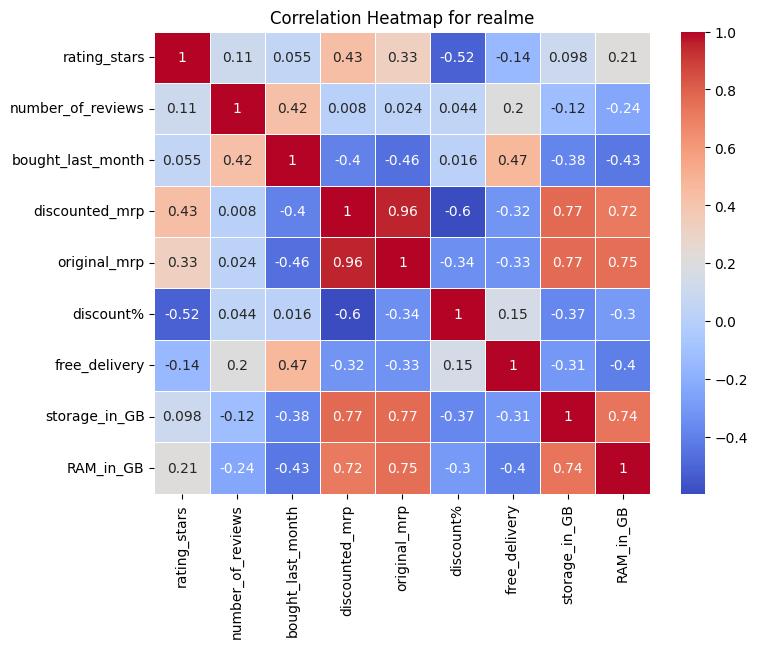

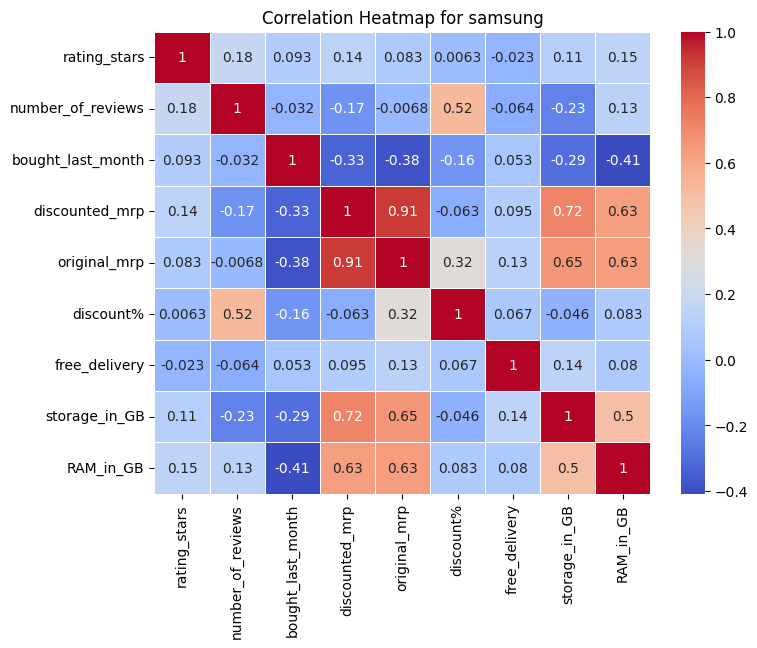

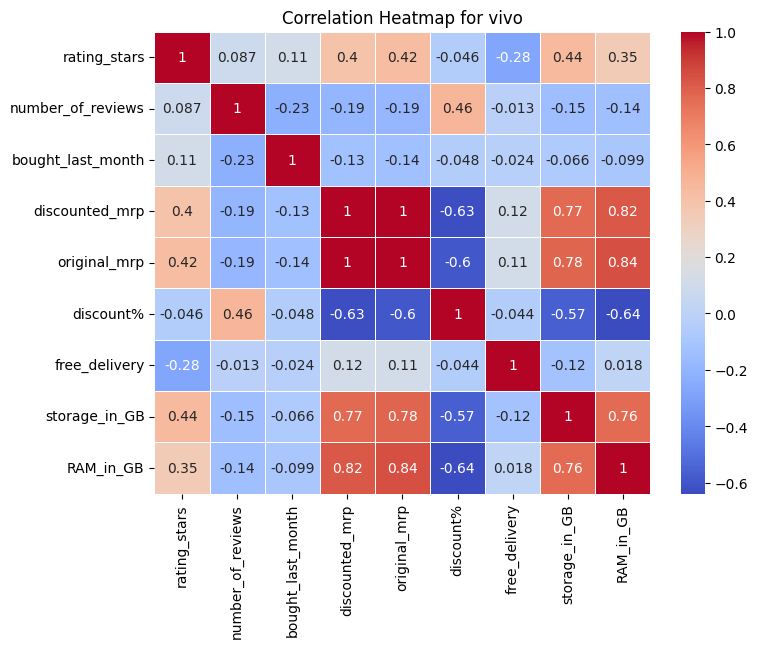

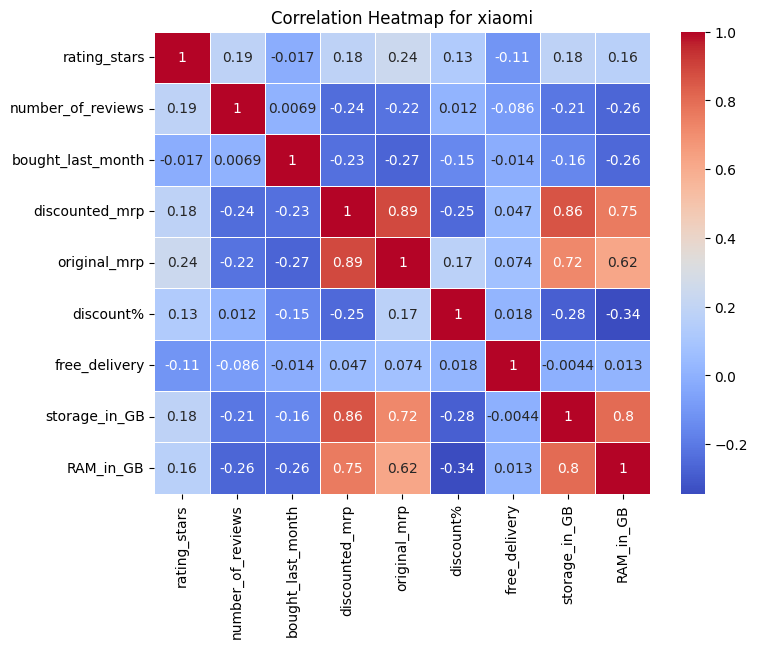

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Brand' and plot correlation heatmap for each brand
for brand_name, group_data in df.groupby('brand'):
    # Select only numeric columns within each brand group
    numeric_data = group_data.select_dtypes(exclude=['object'])
    
    # Calculate correlation matrix
    corr_matrix = numeric_data.corr()
    
    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Correlation Heatmap for {brand_name}')
    plt.show()


In [13]:
# Group by 'Brand' and plot correlation heatmap for each brand
for brand_name, group_data in df.groupby('brand'):
    # Select only numeric columns within each brand group
    numeric_data = group_data.select_dtypes(exclude=['object'])
    
    # Calculate correlation matrix
    corr_matrix = numeric_data.corr()

    print(corr_matrix)


                   rating_stars  number_of_reviews  bought_last_month  \
rating_stars           1.000000           0.150815           0.107047   
number_of_reviews      0.150815           1.000000           0.890905   
bought_last_month      0.107047           0.890905           1.000000   
discounted_mrp        -0.333294          -0.328354          -0.340486   
original_mrp          -0.328423          -0.297286          -0.326269   
discount%              0.138103           0.261271           0.206642   
free_delivery               NaN                NaN                NaN   
storage_in_GB          0.003376          -0.259186          -0.216527   
RAM_in_GB             -0.221220          -0.178777          -0.106207   

                   discounted_mrp  original_mrp  discount%  free_delivery  \
rating_stars            -0.333294     -0.328423   0.138103            NaN   
number_of_reviews       -0.328354     -0.297286   0.261271            NaN   
bought_last_month       -0.340486     

In [16]:
# Initialize an empty dictionary to store sorted correlation results for each brand
sorted_correlations = {}

# Iterate over each brand
for brand_name, brand_data in df.groupby('brand'):
    # Drop irrelevant columns, such as 'productname', 'product', and 'discounted_mrp'
    features = brand_data.drop(columns=['product_name', 'product', 'discounted_mrp'])
    
    # Ensure we're only working with numeric data
    numeric_data = features.select_dtypes(include=['float64', 'int64'])
    
    # Compute correlation matrix
    corr_matrix = numeric_data.corr()
    
    # Extract correlation values for 'discount%' and 'free_delivery' with all other columns
    target_correlations = corr_matrix[['discount%', 'free_delivery']]
    
    # Sort each target variable's correlation values in descending order
    sorted_discount_corr = target_correlations['discount%'].abs().sort_values(ascending=False)
    sorted_free_delivery_corr = target_correlations['free_delivery'].abs().sort_values(ascending=False)
    
    # Store sorted correlations in the dictionary for each brand
    sorted_correlations[brand_name] = {
        'discount%': sorted_discount_corr,
        'free_delivery': sorted_free_delivery_corr
    }
    
    # Print sorted correlation values for each brand
    print(f"\n--- Correlations for Brand: {brand_name} ---")
    print("\nCorrelations with 'discount%' (sorted in descending order):")
    print(sorted_discount_corr)
    print("\nCorrelations with 'free_delivery' (sorted in descending order):")
    print(sorted_free_delivery_corr)



--- Correlations for Brand: apple ---

Correlations with 'discount%' (sorted in descending order):
discount%            1.000000
RAM_in_GB            0.830700
number_of_reviews    0.261271
bought_last_month    0.206642
rating_stars         0.138103
original_mrp         0.134263
storage_in_GB        0.089145
free_delivery             NaN
Name: discount%, dtype: float64

Correlations with 'free_delivery' (sorted in descending order):
rating_stars        NaN
number_of_reviews   NaN
bought_last_month   NaN
original_mrp        NaN
discount%           NaN
free_delivery       NaN
storage_in_GB       NaN
RAM_in_GB           NaN
Name: free_delivery, dtype: float64

--- Correlations for Brand: oneplus ---

Correlations with 'discount%' (sorted in descending order):
discount%            1.000000
rating_stars         0.668499
storage_in_GB        0.313655
free_delivery        0.304309
bought_last_month    0.201264
RAM_in_GB            0.108514
number_of_reviews    0.092078
original_mrp         0.

In [18]:
df[df['brand'] == 'apple']['free_delivery'].value_counts()

free_delivery
0    129
Name: count, dtype: int64

In [21]:
# List of feature columns to consider (excluding 'color', 'discount%' and 'free_delivery')
feature_columns = ['RAM_in_GB', 'storage_in_GB', 'number_of_reviews', 'rating_stars', 'original_mrp', 'bought_last_month']

# Initialize an empty dictionary to store selected features for each color
selected_features_by_color = {}

# Group by color and calculate correlations
for color, group in df.groupby('color'):
    # Calculate correlation matrix for the group
    correlations = group[feature_columns + ['discount%', 'free_delivery']].corr()

    # Get correlations with 'discount%' and 'free_delivery'
    discount_corr = correlations['discount%'].drop('discount%')  # Drop self-correlation
    free_delivery_corr = correlations['free_delivery'].drop('free_delivery')  # Drop self-correlation
    
    # Get the feature with the max absolute correlation for 'discount%'
    max_discount_corr_feature = discount_corr.abs().sort_values(ascending=False)  # Feature with highest abs correlation with discount%
    
    # Get the feature with the max absolute correlation for 'free_delivery'
    max_free_delivery_corr_feature = free_delivery_corr.abs().sort_values(ascending=False)  # Feature with highest abs correlation with free_delivery
    
    # Store the results in the dictionary
    selected_features_by_color[color] = {
        'max_discount_corr_feature': max_discount_corr_feature,
        'max_free_delivery_corr_feature': max_free_delivery_corr_feature
    }

# Print the selected features for each color
for color, features in selected_features_by_color.items():
    print(f"\n--- Selected Features for Color: {color} ---")
    print(f"Feature with max abs correlation to 'discount%': {features['max_discount_corr_feature']}")
    print(f"Feature with max abs correlation to 'free_delivery': {features['max_free_delivery_corr_feature']}")


--- Selected Features for Color: Black ---
Feature with max abs correlation to 'discount%': bought_last_month    0.209302
storage_in_GB        0.194591
rating_stars         0.184024
RAM_in_GB            0.157706
original_mrp         0.129089
number_of_reviews    0.059550
free_delivery        0.042566
Name: discount%, dtype: float64
Feature with max abs correlation to 'free_delivery': bought_last_month    0.206609
RAM_in_GB            0.148507
rating_stars         0.125653
number_of_reviews    0.098575
storage_in_GB        0.093283
discount%            0.042566
original_mrp         0.001621
Name: free_delivery, dtype: float64

--- Selected Features for Color: Black Titanium ---
Feature with max abs correlation to 'discount%': RAM_in_GB            0.999343
original_mrp         0.568125
storage_in_GB        0.547383
bought_last_month    0.547383
rating_stars         0.432797
number_of_reviews    0.261698
free_delivery             NaN
Name: discount%, dtype: float64
Feature with max abs c